In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Load Data

In [2]:
churn= pd.read_csv(r"Z:\Purva226518_2sem\Machine Lear\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Check Data Types

In [3]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Missing Values?

In [4]:
column_names = churn.columns
for column in column_names:
    print(column + ' - ' + str(churn[column].isnull().sum()))

customerID - 0
gender - 0
SeniorCitizen - 0
Partner - 0
Dependents - 0
tenure - 0
PhoneService - 0
MultipleLines - 0
InternetService - 0
OnlineSecurity - 0
OnlineBackup - 0
DeviceProtection - 0
TechSupport - 0
StreamingTV - 0
StreamingMovies - 0
Contract - 0
PaperlessBilling - 0
PaymentMethod - 0
MonthlyCharges - 0
TotalCharges - 0
Churn - 0


# Change datatype of Total Charges

In [5]:
churn.TotalCharges=pd.to_numeric(churn.TotalCharges,errors='coerce') 

# Data Visualization

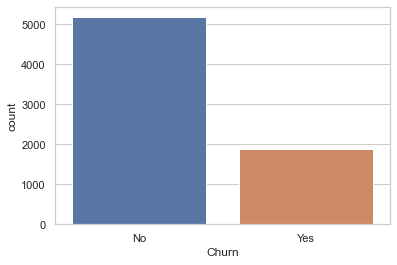

In [6]:
sns.countplot(x='Churn',data=churn);

High frequency of No as Churn

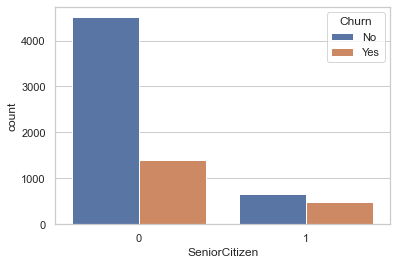

In [7]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=churn);

Senior Citizenship of a customer seems to affect Churn

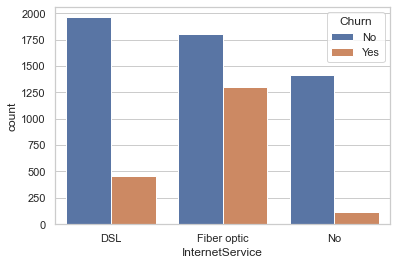

In [8]:
sns.countplot(x='InternetService',hue='Churn',data=churn);

Internet Service of a customer seems to affect Churn

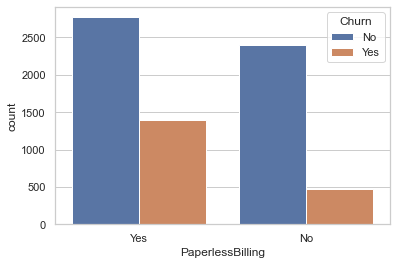

In [9]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=churn);

 Paperless Billing doesn't seems to affect Churn much

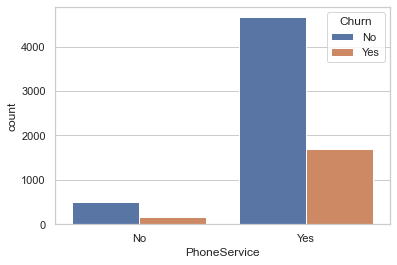

In [10]:
sns.countplot(x='PhoneService',hue='Churn',data=churn);

PhoneService seems to affect Churn

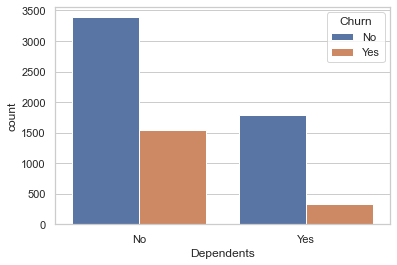

In [11]:
sns.countplot(x='Dependents',hue='Churn',data=churn);

Dependent seems to affect Churn

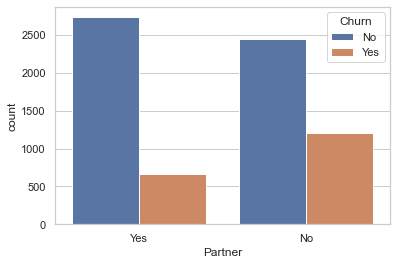

In [12]:
sns.countplot(x='Partner',hue='Churn',data=churn);

Partner doesn't seem to affect Churn much

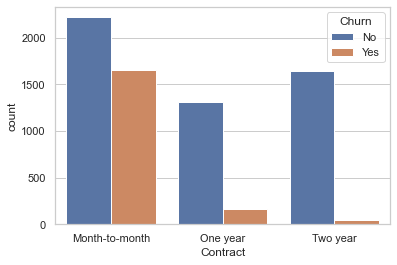

In [13]:
sns.countplot(x="Contract",hue='Churn',data=churn);

Seems that Contract affects the Churn

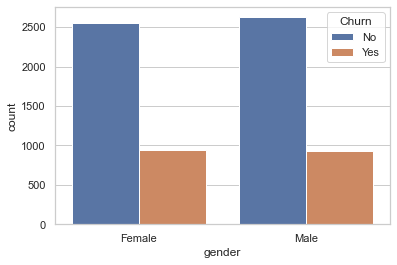

In [14]:
sns.countplot(x="gender",hue='Churn',data=churn);

Gender doesn't seem to affect Churn

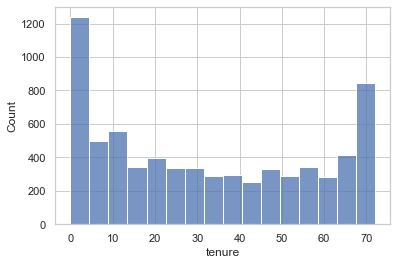

In [15]:
sns.histplot(data=churn,x='tenure');

Most customers are towards the extreme tenure value

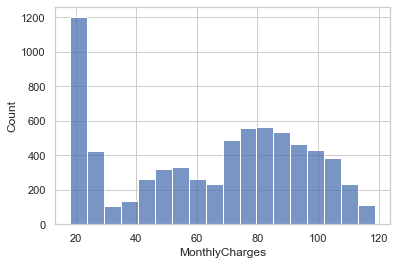

In [16]:
sns.histplot(data=churn,x='MonthlyCharges');

Most customers have low Monthly Charges 

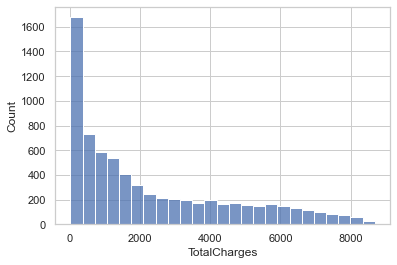

In [17]:
sns.histplot(data=churn,x='TotalCharges');

Most customers have low Total Charges

# Create Dummy Variables

In [18]:
churn=pd.get_dummies(churn,columns=['SeniorCitizen','InternetService','PaperlessBilling','PhoneService','Dependents','Contract','Churn'])
churn

,customerID,gender,Partner,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaperlessBilling_Yes,PhoneService_No,PhoneService_Yes,Dependents_No,Dependents_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes
0,7590-VHVEG,Female,Yes,1,No phone service,No,Yes,No,No,No,...,1,1,0,1,0,1,0,0,1,0
1,5575-GNVDE,Male,No,34,No,Yes,No,Yes,No,No,...,0,0,1,1,0,0,1,0,1,0
2,3668-QPYBK,Male,No,2,No,Yes,Yes,No,No,No,...,1,0,1,1,0,1,0,0,0,1
3,7795-CFOCW,Male,No,45,No phone service,Yes,No,Yes,Yes,No,...,0,1,0,1,0,0,1,0,1,0
4,9237-HQITU,Female,No,2,No,No,No,No,No,No,...,1,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,24,Yes,Yes,No,Yes,Yes,Yes,...,1,0,1,0,1,0,1,0,1,0
7039,2234-XADUH,Female,Yes,72,Yes,No,Yes,Yes,No,Yes,...,1,0,1,0,1,0,1,0,1,0
7040,4801-JZAZL,Female,Yes,11,No phone service,Yes,No,No,No,No,...,1,1,0,0,1,1,0,0,1,0
7041,8361-LTMKD,Male,Yes,4,Yes,No,No,No,No,No,...,1,0,1,1,0,1,0,0,0,1


In [19]:
y=['Churn_Yes']
X=['InternetService_No','PaperlessBilling_Yes','PhoneService_Yes','Dependents_Yes','Contract_Month-to-month','Contract_One year','tenure','MonthlyCharges','TotalCharges']

In [20]:
pd.DataFrame(churn[X])

,InternetService_No,PaperlessBilling_Yes,PhoneService_Yes,Dependents_Yes,Contract_Month-to-month,Contract_One year,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,1,29.85,29.85
1,0,0,1,0,0,1,34,56.95,1889.50
2,0,1,1,0,1,0,2,53.85,108.15
3,0,0,0,0,0,1,45,42.30,1840.75
4,0,1,1,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,0,1,24,84.80,1990.50
7039,0,1,1,1,0,1,72,103.20,7362.90
7040,0,1,0,1,1,0,11,29.60,346.45
7041,0,1,1,0,1,0,4,74.40,306.60


# Predictors

In [21]:
x=np.array(churn[X])[:,:-1]
x

array([[  0.  ,   1.  ,   0.  , ...,   0.  ,   1.  ,  29.85],
       [  0.  ,   0.  ,   1.  , ...,   1.  ,  34.  ,  56.95],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,   2.  ,  53.85],
       ...,
       [  0.  ,   1.  ,   0.  , ...,   0.  ,  11.  ,  29.6 ],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,   4.  ,  74.4 ],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,  66.  , 105.65]])

# Dependent Variable

In [22]:
y=np.array(churn['Churn_Yes'])
y

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

# Training and Testing data

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
x_train

array([[ 0.  ,  1.  ,  1.  , ...,  0.  ,  9.  , 72.9 ],
       [ 0.  ,  1.  ,  1.  , ...,  0.  , 14.  , 82.65],
       [ 0.  ,  0.  ,  0.  , ...,  0.  , 64.  , 47.85],
       ...,
       [ 1.  ,  0.  ,  1.  , ...,  0.  , 58.  , 20.75],
       [ 0.  ,  1.  ,  1.  , ...,  0.  ,  1.  , 69.75],
       [ 1.  ,  0.  ,  1.  , ...,  0.  ,  4.  , 20.4 ]])

# Decision Tree

In [25]:
model=DecisionTreeClassifier(criterion = "gini")
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Predict the results

In [26]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [27]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# Check accuracy score

In [28]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.9899
Test set score: 0.7203


Since for both the training set the accuracy is higher significantly, there is overfitting.

# Confusion Matrix

In [29]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1262  298]
 [ 293  260]]

True Positives(TP) =  1262

True Negatives(TN) =  260

False Positives(FP) =  298

False Negatives(FN) =  293


<AxesSubplot:>

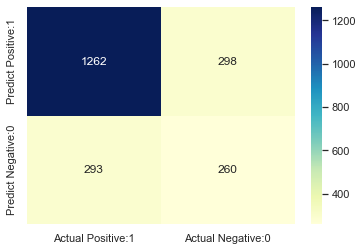

In [30]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1560
           1       0.47      0.47      0.47       553

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



## Classification accuracy

In [32]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [33]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7203


## Classification error

In [34]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2797


In [35]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8090


In [36]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8116


## True Positive Rate
True Positive Rate is synonymous with Recall.

In [37]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8116


## False Positive Rate

In [38]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.5341


## K-Fold Validation

In [39]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = DecisionTreeClassifier(criterion = "gini")
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for training set: %.3f" % (results.mean()))

10-fold cross validation average accuracy for training set: 0.730


In [40]:
results = model_selection.cross_val_score(modelCV, x_test, y_test, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for testing set: %.3f" % (results.mean()))

10-fold cross validation average accuracy for testing set: 0.719


We got accuracy 72% after done with 10-fold cross validation, so our model designed good.